# Imports

In [1]:
import importlib
import pathlib
import sys
sys.path.append(pathlib.Path('.').parent.absolute())
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import exp_data as D
importlib.reload(D);

# Dataframes

In [2]:
df_FSD50K = D.dataframe_fsd50k()
df_DEMAND = D.dataframe_demand()
df_MUSAN = D.dataframe_musan()
df_LIBRISPEECH = D.dataframe_librispeech()

# Sparsity

Listen to any example from the various datasets here, just fill in the `iloc` for row index.

In [3]:
import IPython.display as ipd
example = df_FSD50K.sort_values(by='sparsity', ascending=False).iloc[100]
y, sr = librosa.load(example.filepath, sr=None)
print('Sparsity Index={}'.format(example.sparsity))
ipd.display(ipd.Audio(y, rate=sr))

Sparsity Index=0.18714703619480133


Overall dataset statistics.

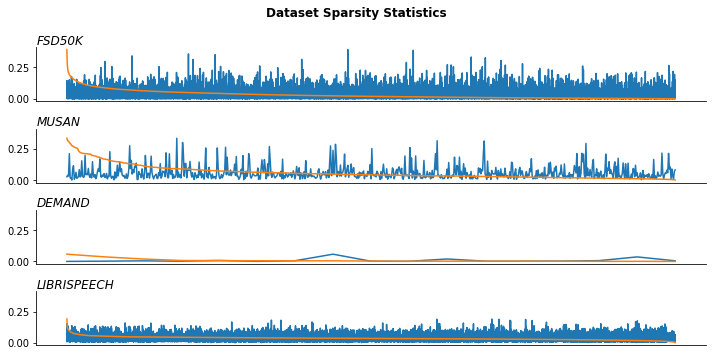

In [4]:
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 5), sharey=True)
sort = lambda d: d.sort_values(by='sparsity', ascending=False)
label_args = dict(rotation=0, loc='left', va='bottom', ha='left', fontstyle='italic', pad=0)
fig.patch.set_alpha(1)
for i, df in enumerate([df_FSD50K, df_MUSAN, df_DEMAND, df_LIBRISPEECH]):
    ax[i].plot(df.sparsity.tolist())
    ax[i].plot(sort(df).sparsity.tolist())
    ax[i].set_title(df.index.name, **label_args)
    ax[i].set_xticks([])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
#     print('\n>>> {}'.format(df.index.name))
#     print(df.sparsity.describe().apply("{0:.6f}".format))
plt.suptitle('Dataset Sparsity Statistics', fontweight='bold')
plt.tight_layout()
plt.show()